# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(n_samples=400, noise=0.2, factor=0.5, random_state=42),
    make_moons(n_samples=400, noise=0.2, random_state=42),
    make_classification(n_samples=400, n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

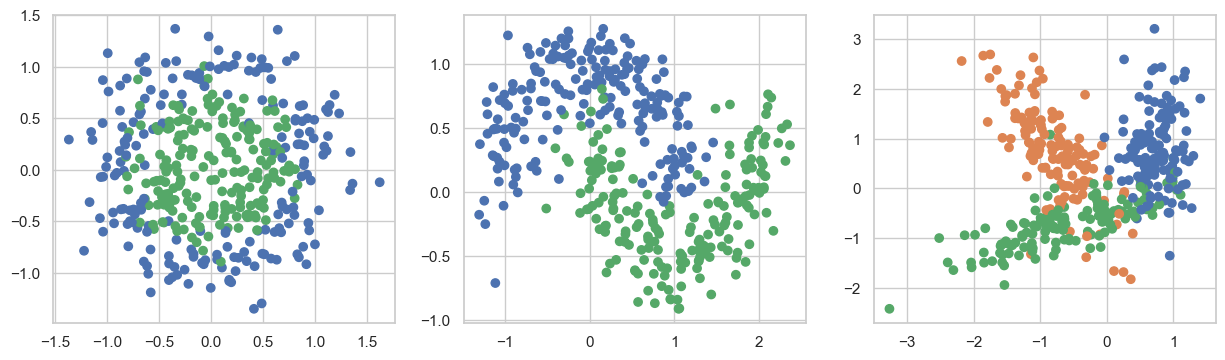

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, ax, name=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    
    if name is not None:
        ax.set_title(name)

In [6]:
dataset_names = ['circles', 'moons', 'classification']

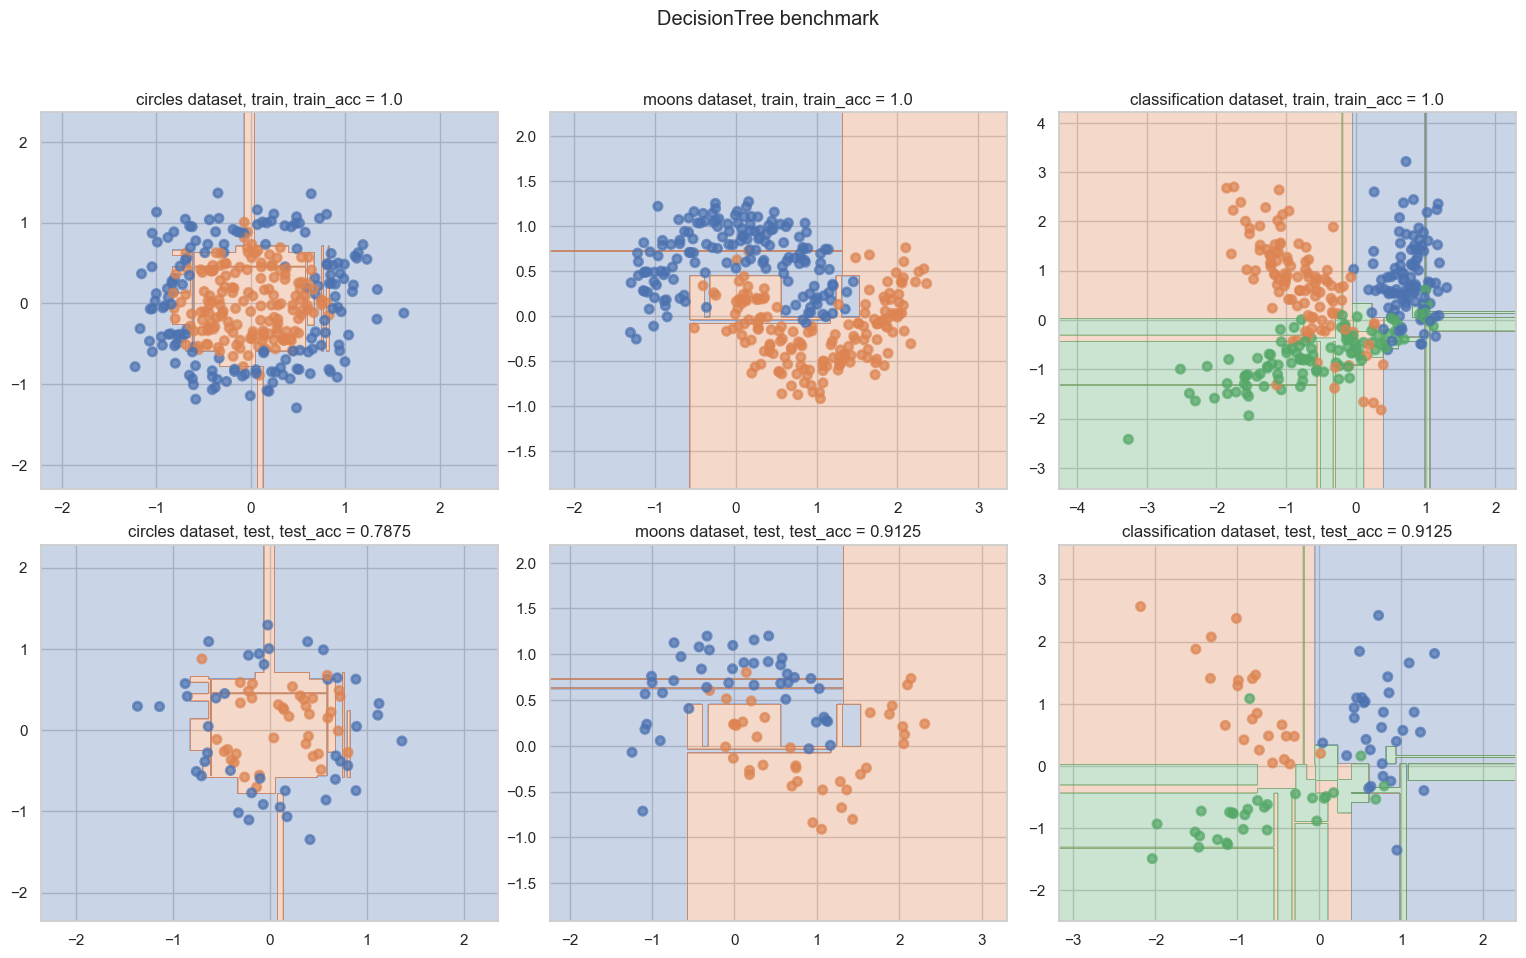

In [7]:
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    _ = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    plot_surface(model, X_train, y_train, ax[0, i], name=f'{dataset_names[i]} dataset, train, train_acc = {train_acc}')
    plot_surface(model, X_test, y_test, ax[1, i], name=f'{dataset_names[i]} dataset, test, test_acc = {test_acc}')
    fig.suptitle('DecisionTree benchmark')

__Ответ:__ Видно, что деревья без ограничений сильно переобучаются

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact, IntSlider, Dropdown

def get_plot_data(model, X, y, plot_step=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    return Z, x_min, x_max, y_min, y_max

def update_plot(dataset_idx=0, max_depth=2, min_samples_leaf=1):
    colorscale = [[0, '#636EFA'], [0.5, '#EF553B'], [1, '#00CC96']]

    X, y = datasets[dataset_idx]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = DecisionTreeClassifier(
        max_depth=max_depth, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    Z_train, x_min, x_max, y_min, y_max = get_plot_data(model, X_train, y_train)
    Z_test = Z_train
    
    fig.data = []
    
    fig.add_trace(
        go.Contour(
            x=np.arange(x_min, x_max, 0.02),
            y=np.arange(y_min, y_max, 0.02),
            z=Z_train,
            colorscale=colorscale,
            opacity=0.3,
            showscale=False,
            name="Decision Boundary",
            contours=dict(coloring='fill')
        ),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Contour(
            x=np.arange(x_min, x_max, 0.02),
            y=np.arange(y_min, y_max, 0.02),
            z=Z_test,
            colorscale=colorscale,
            opacity=0.3,
            showscale=False,
            name="Decision Boundary",
            contours=dict(coloring='fill')
        ),
        row=1, col=2
    )
    
    fig.add_trace(
        go.Scatter(
            x=X_train[:, 0],
            y=X_train[:, 1],
            mode='markers',
            marker=dict(
                color=y_train,
                colorscale=colorscale,
                size=8,
                line=dict(width=1, color='DarkSlateGrey')
            ),
            name="Train Data",
            showlegend=False
        ),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Scatter(
            x=X_test[:, 0],
            y=X_test[:, 1],
            mode='markers',
            marker=dict(
                color=y_test,
                colorscale=colorscale,
                size=8,
                line=dict(width=1, color='DarkSlateGrey')
            ),
            name="Test Data",
            showlegend=False
        ),
        row=1, col=2
    )
    
    fig.update_xaxes(range=[x_min, x_max], row=1, col=1)
    fig.update_yaxes(range=[y_min, y_max], row=1, col=1)
    fig.update_xaxes(range=[x_min, x_max], row=1, col=2)
    fig.update_yaxes(range=[y_min, y_max], row=1, col=2)
    
    fig.update_layout(
        height=600,
        width=1500,
        margin=dict(l=50, r=50, t=100, b=50),
        title_text=f"Dataset: {dataset_names[dataset_idx]} | Max Depth: {max_depth} | Min Samples Leaf: {min_samples_leaf}",
        title_x=0.5,
        annotations=[
            dict(
                text=f"Train Accuracy: {train_acc:.3f}",
                x=0.225, y=1.08,
                xref="paper", yref="paper",
                showarrow=False,
                font=dict(size=14)
            ),
            dict(
                text=f"Test Accuracy: {test_acc:.3f}",
                x=0.775, y=1.08,
                xref="paper", yref="paper",
                showarrow=False,
                font=dict(size=14)
            )
        ]
    )
    
    fig.show()

In [9]:
max_depth_arr =  [2, 4, 6, 8, 10]
min_samples_leaf_arr =  [1, 3, 5, 7, 9]

fig = make_subplots(
    rows=1, 
    cols=2, 
    subplot_titles=("Train", "Test"),
    horizontal_spacing=0.2,
    vertical_spacing=0.3
)

depth_slider = IntSlider(
    value=max_depth_arr[0],
    min=min(max_depth_arr),
    max=max(max_depth_arr),
    step=(max_depth_arr[1] - max_depth_arr[0]) if len(max_depth_arr) > 1 else 1,
    description='Max Depth:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

leaf_slider = IntSlider(
    value=min_samples_leaf_arr[0],
    min=min(min_samples_leaf_arr),
    max=max(min_samples_leaf_arr),
    step=(min_samples_leaf_arr[1] - min_samples_leaf_arr[0]) if len(min_samples_leaf_arr) > 1 else 1,
    description='Min Samples Leaf:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

dataset_dropdown = Dropdown(
    options=list(zip(dataset_names, range(len(dataset_names)))),
    value=0,
    description='Dataset:',
    style={'description_width': 'initial'}
)

interact(
    update_plot,
    dataset_idx=dataset_dropdown,
    max_depth=depth_slider,
    min_samples_leaf=leaf_slider
);

interactive(children=(Dropdown(description='Dataset:', options=(('circles', 0), ('moons', 1), ('classification…

__Ответ:__ При увеличении глубины или уменьшении минимального числа элементов в листе дерево переобучается. При этом характер переобучения крайне сильно зависит не только от датасета, но и от разбиения на треин и тест выборки

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
df = pd.read_csv('students.csv')
df.head()


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [11]:
X = df.drop(columns='UNS')
target = df['UNS']

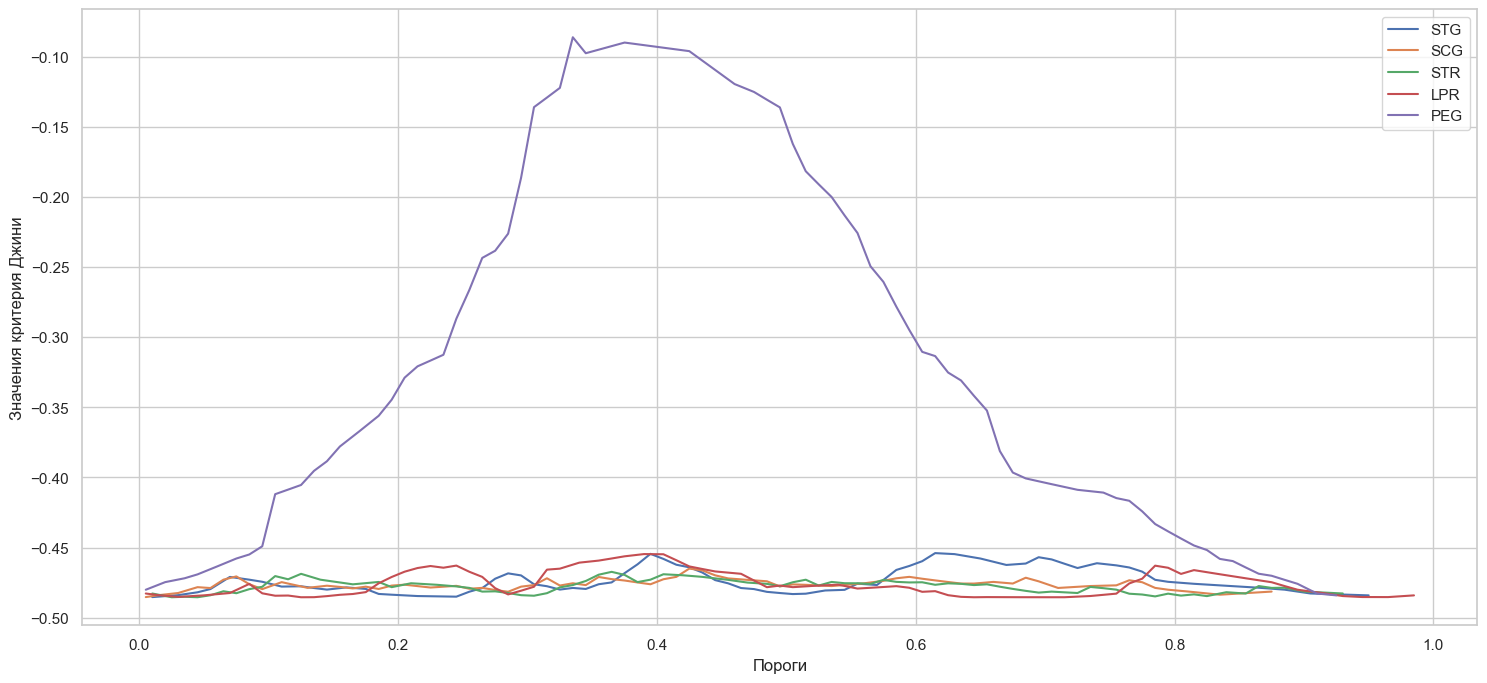

In [12]:
import hw5code as my_trees
fig, ax  = plt.subplots(figsize=(18, 8))

for col in X.columns:
    thresholds, ginis, _, _ = my_trees.find_best_split(X[col].to_numpy(), target.to_numpy())
    ax.plot(thresholds, ginis, label=col)
ax.legend()
ax.set_ylabel('Значения критерия Джини')
ax.set_xlabel('Пороги')
plt.show()

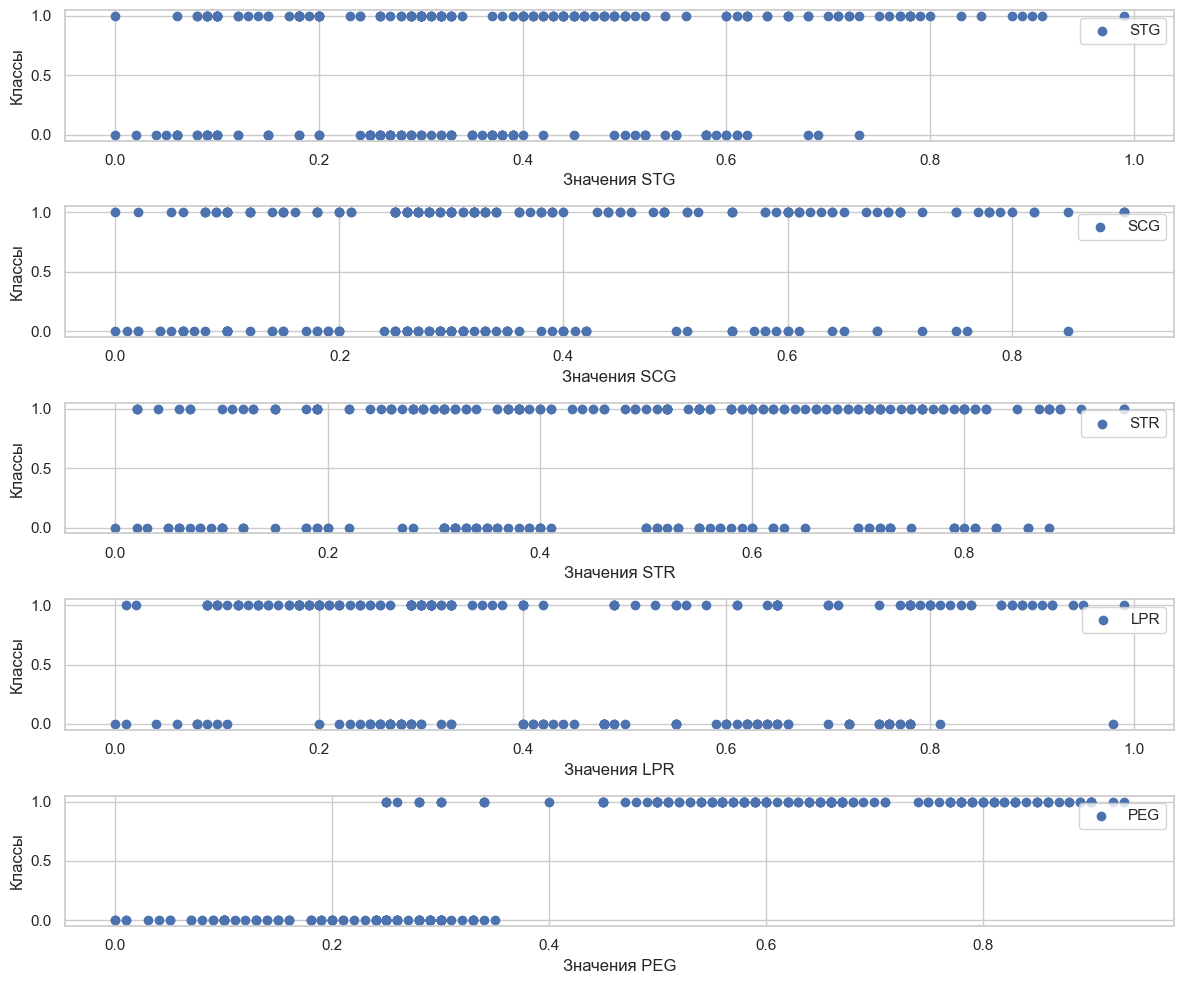

In [13]:
fig, ax  = plt.subplots(nrows=5, figsize=(12, 10))
for i, col in enumerate(X.columns):
    ax[i].scatter(X[col], target, label=col)
    ax[i].legend()
    ax[i].set_ylabel('Классы')
    ax[i].set_xlabel(f'Значения {col}')
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Лучший признак для деления -- PEG. Этот результат полностью согласуется со scatter-графиком, так как только для этого признака можно почти идеально разделить выборку по классам вертикальной прямой. Кривая критерия Джини для "хорошего" прищнака должна иметь острый пик, при этом для "плохих" признаков кривые практически постоянны

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
data = pd.read_csv('agaricus-lepiota.data')

X = data.drop(columns='p')
y = data['p']

In [15]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X = oe.fit_transform(X)
y = y.replace({'e': 0, 'p': 1})

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy(), test_size=0.5, random_state=42)

model = my_trees.DecisionTree(feature_types=22 * ["categorical"])
model.fit(X_train, y_train)

train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f'accuracy train: {train_acc:.3f}')
print(f'accuracy test: {test_acc:.3f}')

accuracy train: 1.000
accuracy test: 1.000


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [17]:
tic_tac_data = pd.read_csv('tic-tac-toe-endgame.csv')
tic_tac_data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive


In [18]:
X = tic_tac_data.drop(columns='V10')
y = tic_tac_data['V10'].replace({'positive': 1, 'negative':0}).to_numpy()

oe = OrdinalEncoder()
X = oe.fit_transform(X)

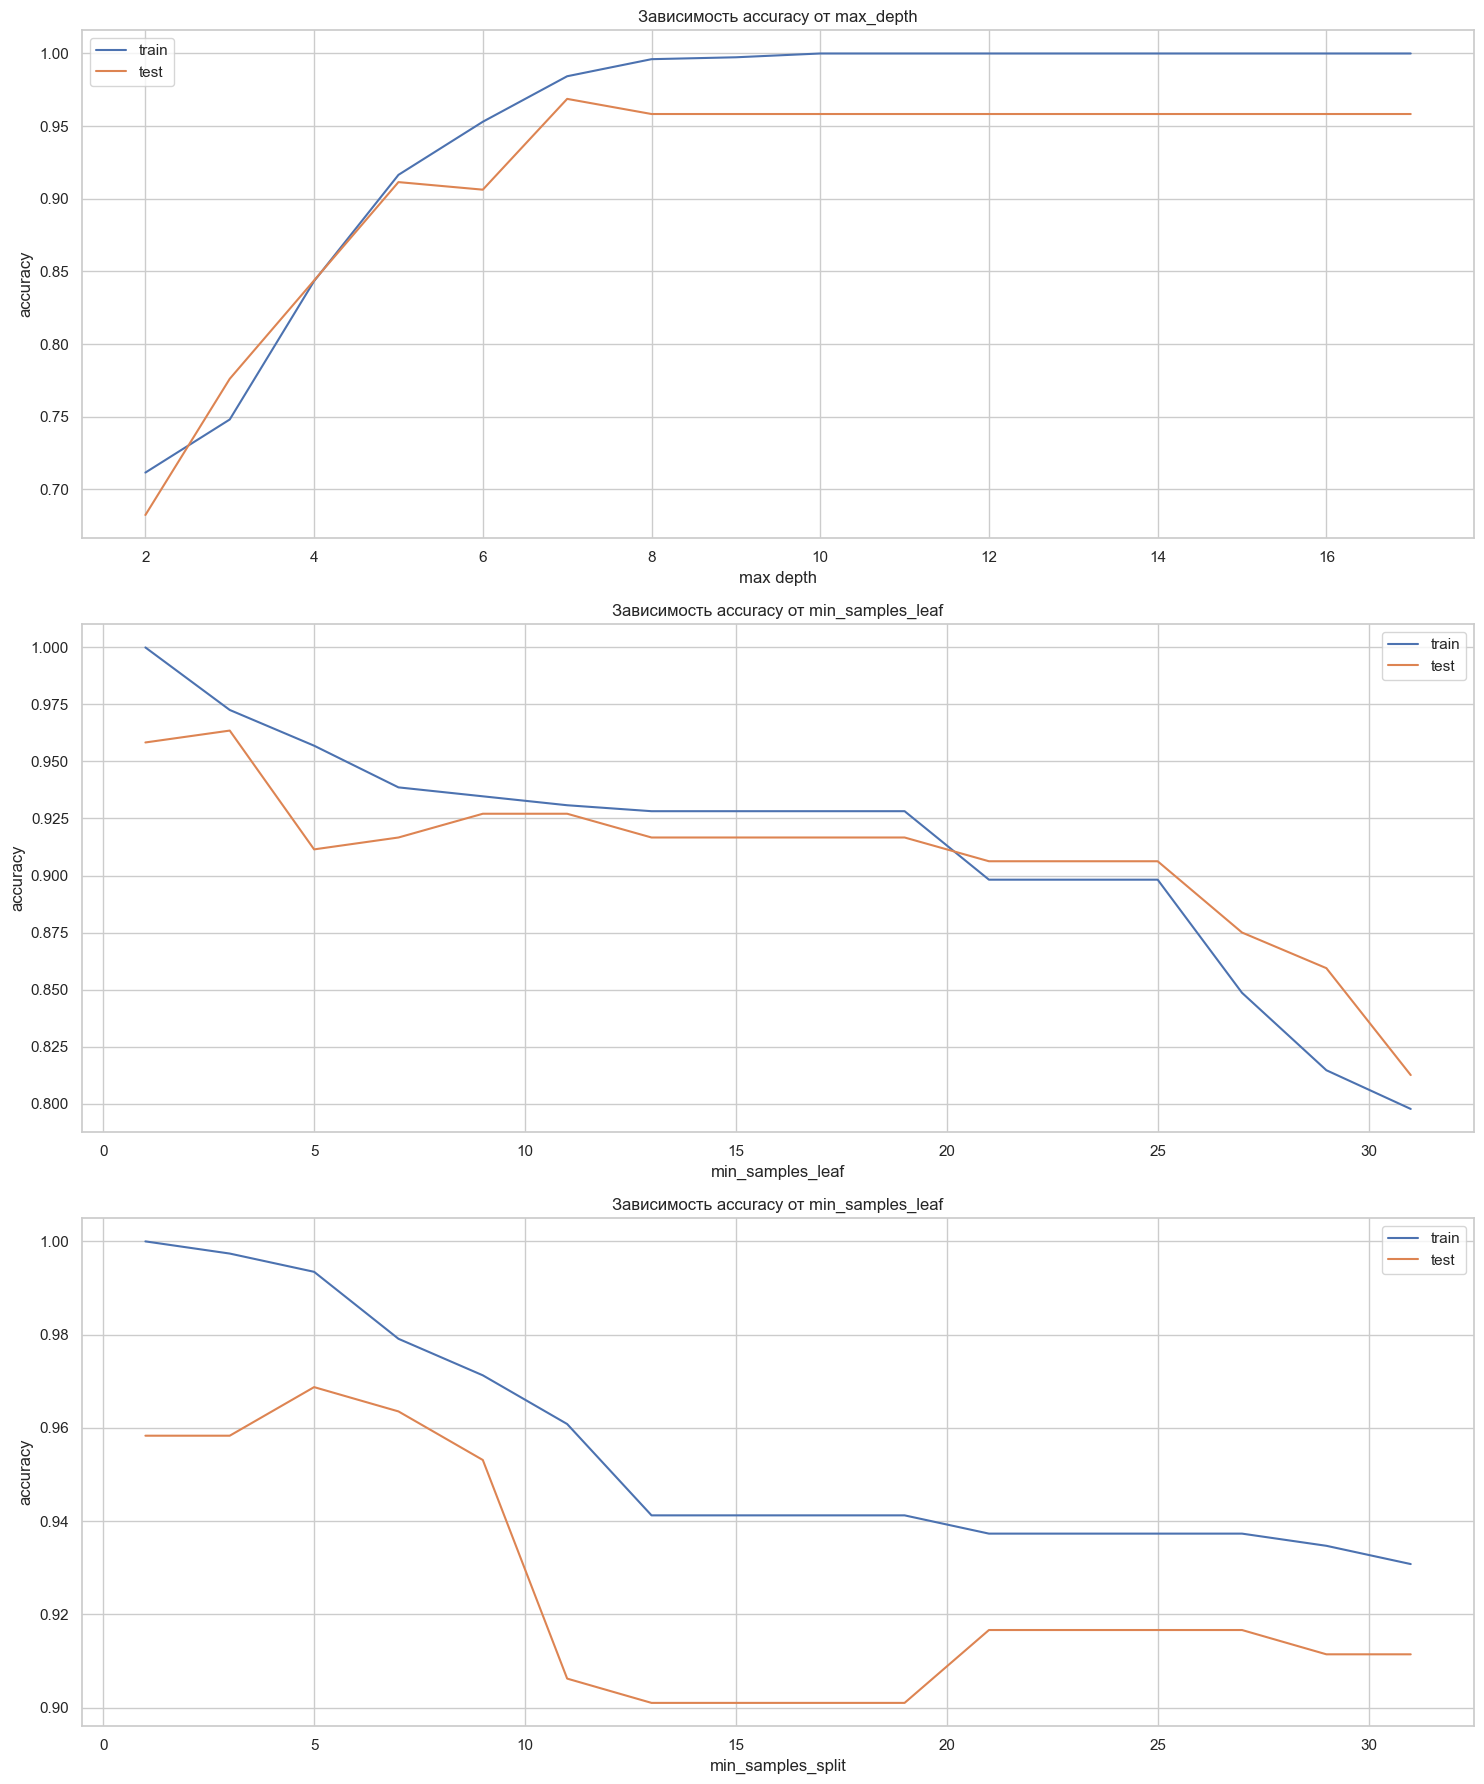

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

max_depth_arr = [2, 3, 4, 5, 6, 7, 8, 10, 12, 14]
min_samples_leaf_arr = [1, 2, 3, 4, 6, 8, 10, 15, 20, 25]
min_samples_split_arr = [1, 2, 3, 4, 6, 8, 10, 15, 20, 25]

max_depth_arr = np.arange(2, 18, 1)
min_samples_leaf_arr = np.arange(1, 33, 2)
min_samples_split_arr = np.arange(1, 33, 2)

depth_acc_tn, leaf_acc_tn, split_acc_tn = [], [], []
depth_acc_tt, leaf_acc_tt, split_acc_tt = [], [], []
feature_types = ['categorical'] * X.shape[1]

fig, ax = plt.subplots(nrows=3, figsize=(15, 18))

for i in range(len(max_depth_arr)):
    max_depth = max_depth_arr[i]
    min_samples_leaf = min_samples_leaf_arr[i]
    min_samples_split = min_samples_split_arr[i]

    model = my_trees.DecisionTree(feature_types, max_depth=max_depth)
    model.fit(X_train, y_train)
    depth_acc_tn.append(accuracy_score(y_train, model.predict(X_train)))
    depth_acc_tt.append(accuracy_score(y_test, model.predict(X_test)))

    model = my_trees.DecisionTree(feature_types, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    leaf_acc_tn.append(accuracy_score(y_train, model.predict(X_train)))
    leaf_acc_tt.append(accuracy_score(y_test, model.predict(X_test)))

    model = my_trees.DecisionTree(feature_types, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    split_acc_tn.append(accuracy_score(y_train, model.predict(X_train)))
    split_acc_tt.append(accuracy_score(y_test, model.predict(X_test)))

ax[0].plot(max_depth_arr, depth_acc_tn, label='train')
ax[0].plot(max_depth_arr, depth_acc_tt, label='test')
ax[0].legend()
ax[0].set_xlabel('max depth')
ax[0].set_ylabel('accuracy')
ax[0].set_title('Зависимость accuracy от max_depth')

ax[1].plot(min_samples_leaf_arr, leaf_acc_tn, label='train')
ax[1].plot(min_samples_leaf_arr, leaf_acc_tt, label='test')
ax[1].legend()
ax[1].set_xlabel('min_samples_leaf')
ax[1].set_ylabel('accuracy')
ax[1].set_title('Зависимость accuracy от min_samples_leaf')

ax[2].plot(min_samples_split_arr, split_acc_tn, label='train')
ax[2].plot(min_samples_split_arr, split_acc_tt, label='test')
ax[2].legend()
ax[2].set_xlabel('min_samples_split')
ax[2].set_ylabel('accuracy')
ax[2].set_title('Зависимость accuracy от min_samples_leaf')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

for x in X:
    split = x < np.quantile(x, 0.5)
    print(x)
    print(x[~split])
    break

[2. 2. 2. 2. 1. 1. 2. 1. 1.]
[2. 2. 2. 2. 2.]


__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from tqdm import tqdm

df = fetch_california_housing()
X, y = df.data, df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
best_params = None
best_mse = np.inf

param_grid = {'max_depth': [3, 5, 7],
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf': [5, 10, 15]
              }

for max_depth in tqdm(param_grid["max_depth"], desc="Max Depth"):
    for min_samples_split in param_grid["min_samples_split"]:
        for min_samples_leaf in param_grid["min_samples_leaf"]:
            linear_tree = my_trees.LinearRegressionTree(
                feature_types=["real"] * X.shape[1],
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            linear_tree.fit(X_train, y_train)
            y_pred = linear_tree.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_params = {
                    "max_depth": max_depth,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf,
                }
print(f'Лучшие параметры: {best_params}')
print(f'Лучший test mse: {best_mse}')

Max Depth: 100%|██████████| 3/3 [04:41<00:00, 93.95s/it] 

Лучшие параметры: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 15}
Лучший test mse: 0.32711709755993146


In [37]:
model = Pipeline([
    ('model', DecisionTreeRegressor(random_state=42))
])

cv = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {'model__max_depth': [3, 5, 7],
              'model__min_samples_split': [5, 10, 15],
              'model__min_samples_leaf': [5, 10, 15]
              }

gc = GridSearchCV(estimator=model,
                         param_grid=param_grid,
                         cv=cv,
                         scoring='neg_mean_squared_error'
                         )

_ = gc.fit(X_train, y_train)

In [41]:
print(f'Лучшие параметры: {gc.best_params_}')
print(f'Лучший cv mse: {-gc.best_score_}')
print(f'Лучший test mse: {mean_squared_error(y_test, gc.best_estimator_.predict(X_test))}')

Лучшие параметры: {'model__max_depth': 7, 'model__min_samples_leaf': 15, 'model__min_samples_split': 5}
Лучший cv mse: 0.4483155983226534
Лучший test mse: 0.45325253575404656


__Ответ:__ наше дерево учится заметно медленнее из-за большого количесвта обучений линейных моделей внутри, в то же время результат становится гораздо лучше

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

In [60]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

linear_tree = my_trees.LinearRegressionTree(
            feature_types=["real"] * x.shape[1],
            max_depth=7,
            min_samples_split=5,
            min_samples_leaf=15
        )

_ = linear_tree.fit(x_train, y_train)

standart_tree = DecisionTreeRegressor(
                max_depth=7,
                min_samples_split=10,
                min_samples_leaf=10,
                random_state=42
        )
_ = standart_tree.fit(x_train, y_train)

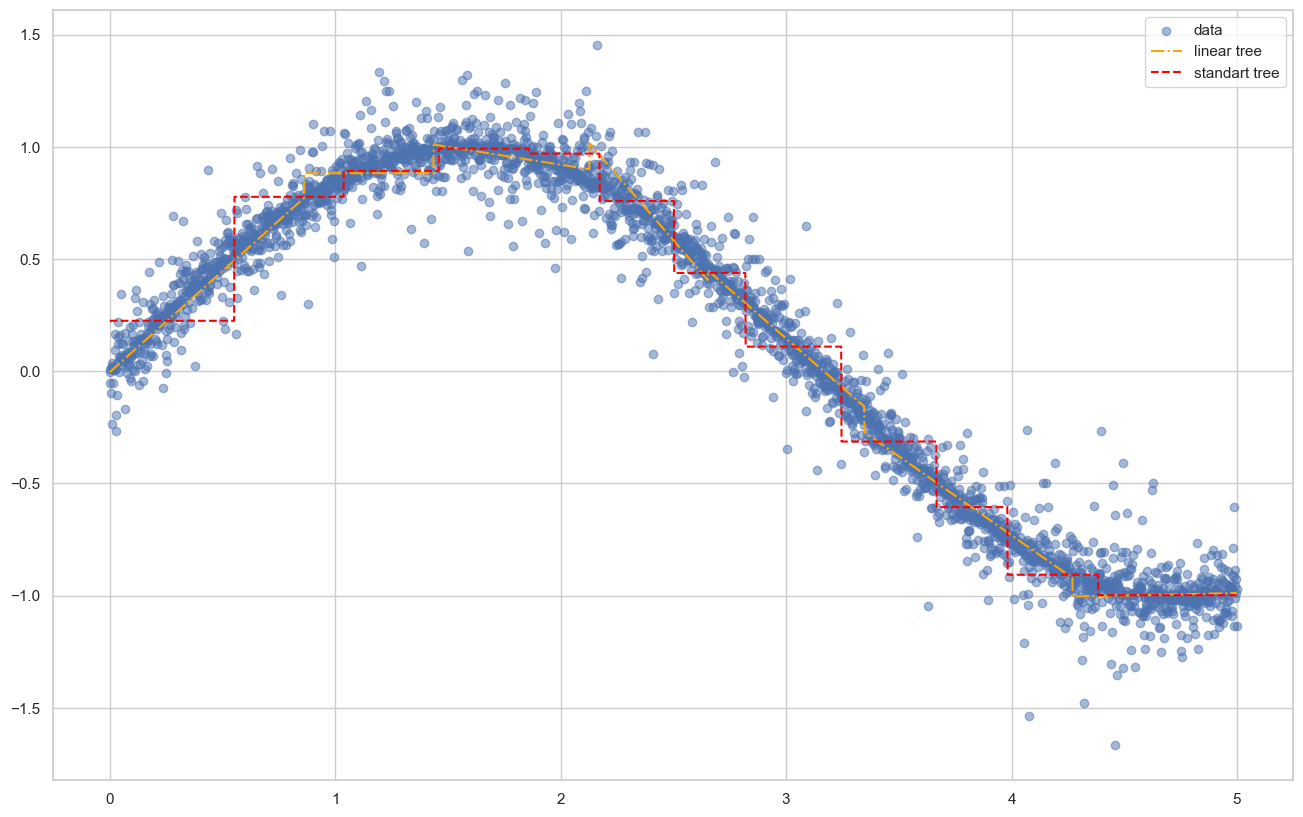

In [64]:
fig, ax = plt.subplots(figsize=(16, 10))

linear_y = linear_tree.predict(x)
standart_y = standart_tree.predict(x)

ax.scatter(x, y, label='data', alpha=0.5)
ax.plot(x, linear_y, label='linear tree', color='orange', linestyle='-.')
ax.plot(x, standart_y, label='standart tree', color='red', linestyle='--')

ax.legend()
plt.show()